# Language Models

In [1]:
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import Vocabulary, MLE, Lidstone
from nltk.util import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import utils.json_utils as jsu

In [3]:
n = 10

In [4]:
tokenized_train = jsu.read_json("9_raw_tokenized_sentences_black_clover.json")

In [5]:
train, vocab_ = padded_everygram_pipeline(n, tokenized_train)

In [6]:
vocab = Vocabulary(vocab_, unk_cutoff=2)

In [7]:
print(sorted(vocab.counts, key=vocab.counts.get)[:5])
print(sorted(vocab.counts, key=vocab.counts.get, reverse=True)[:5])

['Fifteen', 'outshines', 'attains', 'Motivated', 'acknowledgment']
['<s>', '</s>', 'the', '.', 'and']


In [8]:
lm = MLE(n, vocabulary=vocab)

In [9]:
lm.fit(train)

In [10]:
print(lm.vocab)
print(lm.counts)

<Vocabulary with cutoff=2 unk_label='<UNK>' and 3691 items>
<NgramCounter with 10 ngram orders and 1631855 ngrams>


In [11]:
def generate_wordcloud_color(stoplist, frequencies):
    wordcloud = WordCloud(stopwords=stoplist, collocations=False, colormap='viridis', width=1080, height=768).generate_from_frequencies(frequencies)
    return wordcloud

In [12]:
def generate_wordcloud_color_no_ranks(stoplist, frequencies):
    wordcloud = WordCloud(stopwords=stoplist, collocations=False, colormap='viridis', relative_scaling=1, min_font_size=50, max_font_size=50, width=1080, height=768).generate_from_frequencies(frequencies)
    return wordcloud

In [13]:
def graph_wordcloud(wordcloud, title=None):
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    if title is not None:
        plt.title(title)
    plt.show()

In [14]:
import nltk
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
from nltk.corpus import wordnet
from nltk import word_tokenize

pos_tag2lemmatize = {
    'NN' : wordnet.NOUN,
    'VB' : wordnet.VERB,
    'JJ' : wordnet.ADJ,
    'RB' : wordnet.ADV
}

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\paula\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\paula\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\paula\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\paula\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [15]:
nltk.pos_tag(word_tokenize("hi ketchup"))

[('hi', 'NN'), ('ketchup', 'NN')]

In [16]:
predict = ["Yuno", "is"]
predicted = list(filter(lambda x : nltk.pos_tag([x[0]])[0][1][:2] in pos_tag2lemmatize, sorted(lm.counts[predict].items(), key=lambda x: x[1], reverse=True)))
print(predict)
print(predicted)

['Yuno', 'is']
[('Asta', 2), ('going', 2), ('not', 2), ('also', 2), ('able', 1), ('wanted', 1), ('introduced', 1), ('given', 1), ('almost', 1), ('useless', 1), ('better', 1), ('finally', 1), ('there', 1), ('congratulated', 1), ('battling', 1), ('acting', 1), ('embarrassed', 1), ('proud', 1), ('Yuno', 1), ('really', 1), ('Mimosa', 1), ('watching', 1), ('being', 1), ('stopped', 1), ('flying', 1), ('correct', 1), ('involved', 1), ('just', 1)]


In [17]:
predicted_repeated = [pair[0] for pair in predicted for i in range(0, pair[1])]
predicted_repeated

['Asta',
 'Asta',
 'going',
 'going',
 'not',
 'not',
 'also',
 'also',
 'able',
 'wanted',
 'introduced',
 'given',
 'almost',
 'useless',
 'better',
 'finally',
 'there',
 'congratulated',
 'battling',
 'acting',
 'embarrassed',
 'proud',
 'Yuno',
 'really',
 'Mimosa',
 'watching',
 'being',
 'stopped',
 'flying',
 'correct',
 'involved',
 'just']

In [18]:
predicted_as_series = pd.Series(predicted_repeated)
predicted_as_series.value_counts()

Asta             2
not              2
also             2
going            2
embarrassed      1
involved         1
correct          1
flying           1
stopped          1
being            1
watching         1
Mimosa           1
really           1
Yuno             1
proud            1
battling         1
acting           1
congratulated    1
there            1
finally          1
better           1
useless          1
almost           1
given            1
introduced       1
wanted           1
able             1
just             1
dtype: int64

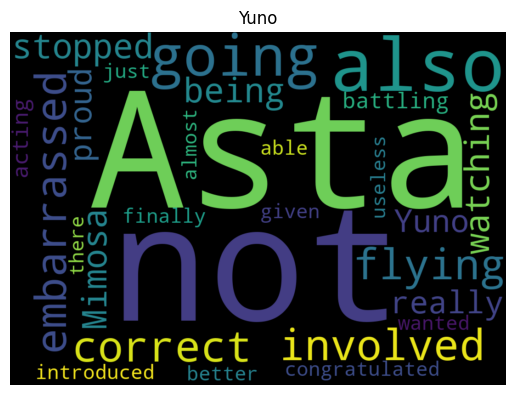

In [19]:
graph_wordcloud(generate_wordcloud_color(None, predicted_as_series.value_counts()), "Yuno")

In [20]:
characters = jsu.read_json("3_characters_black_clover.json")

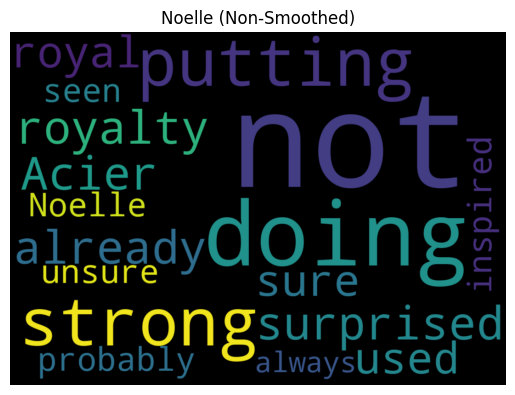

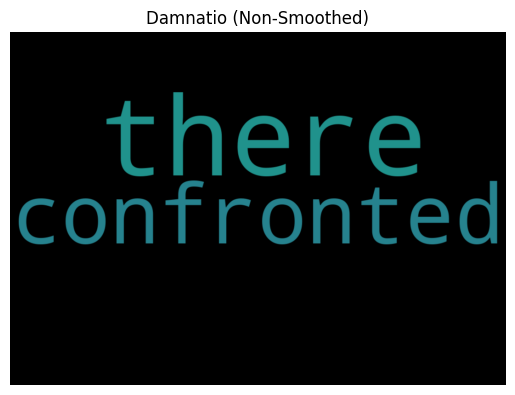

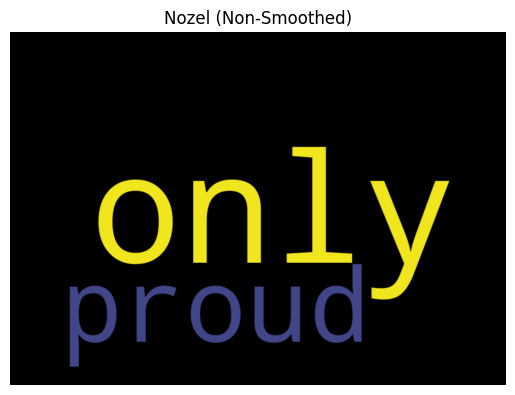

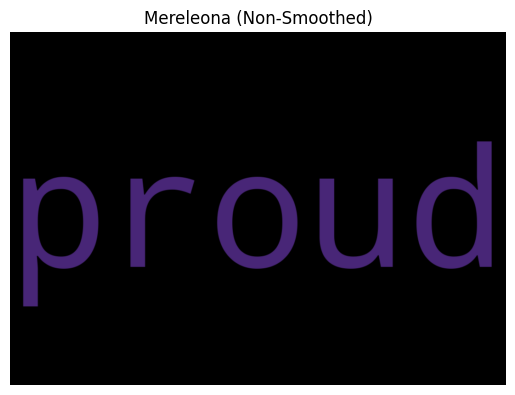

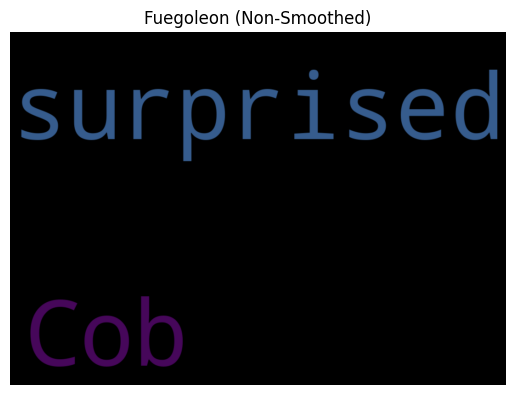

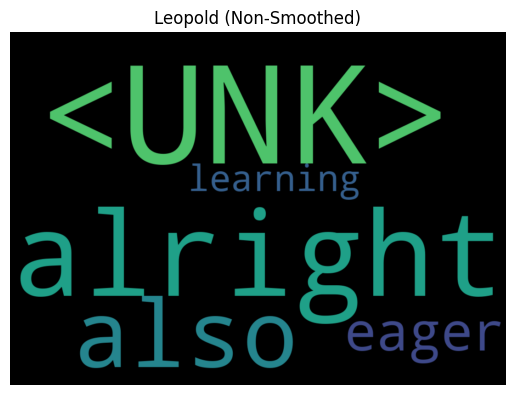

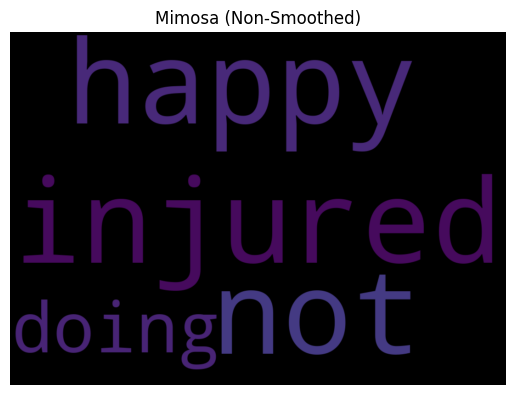

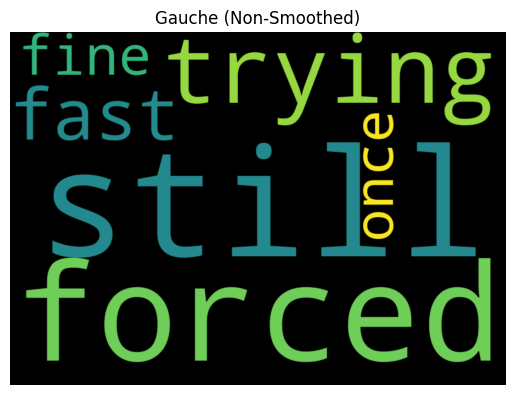

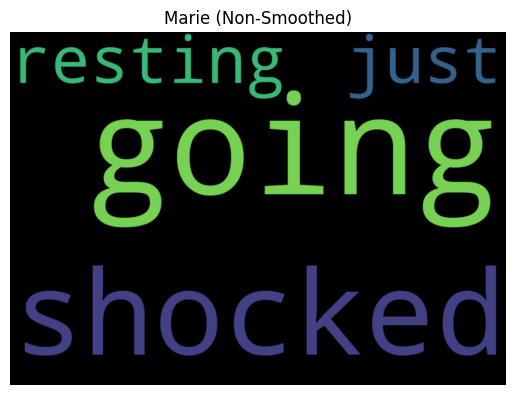

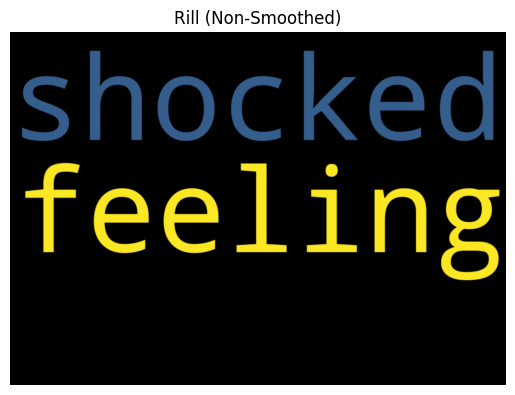

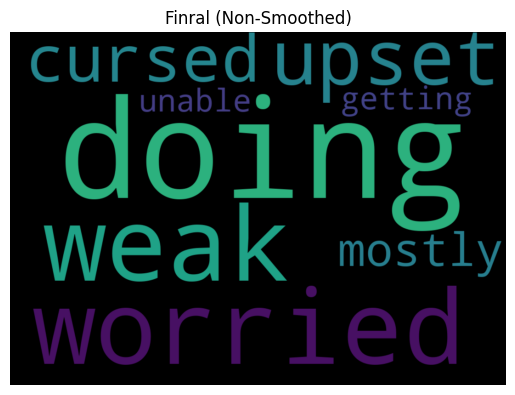

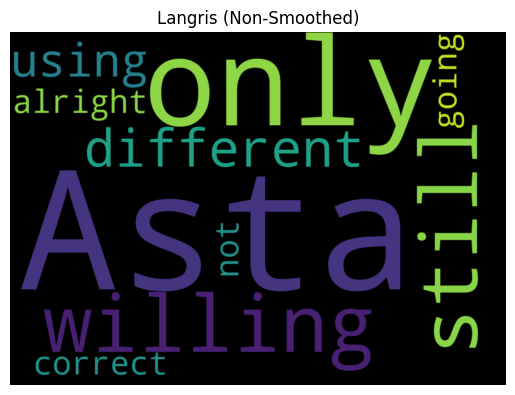

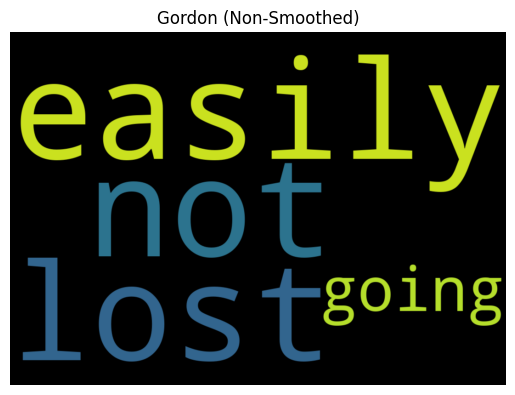

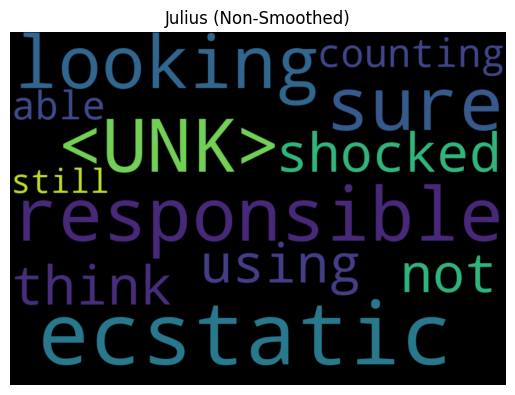

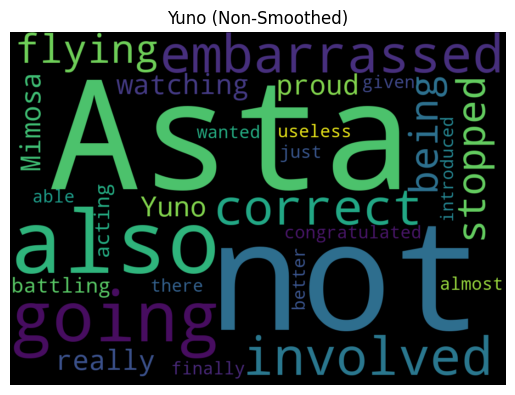

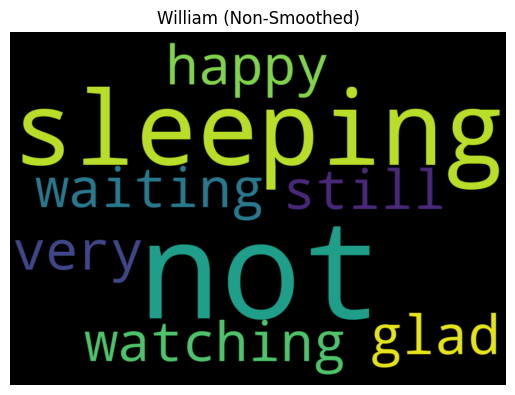

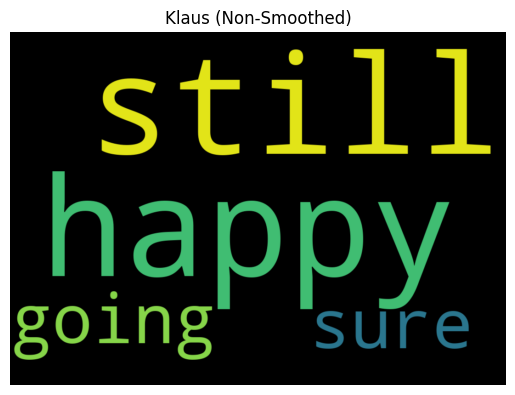

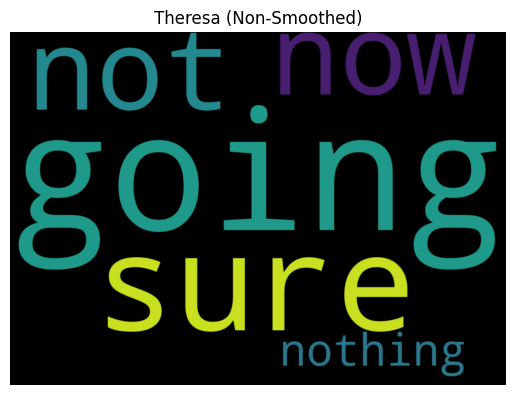

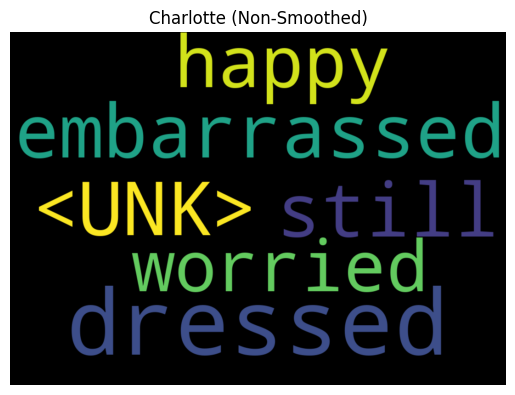

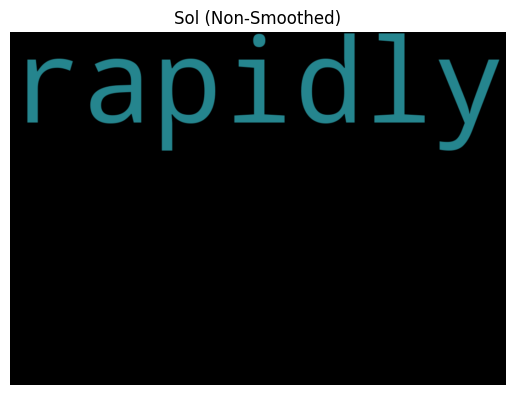

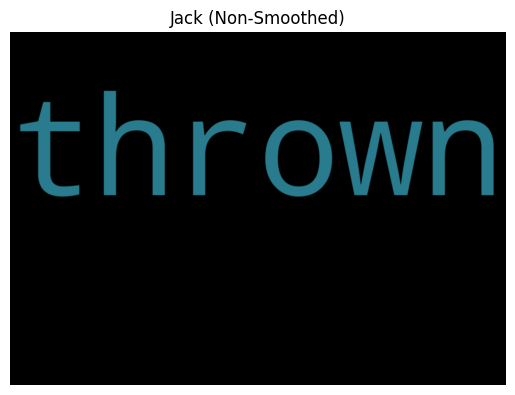

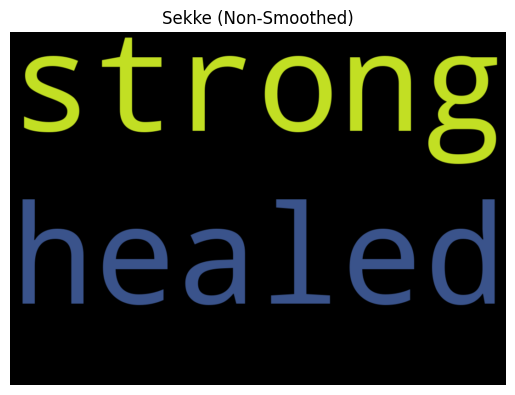

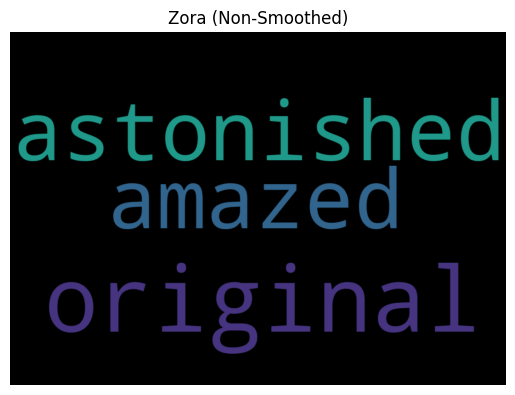

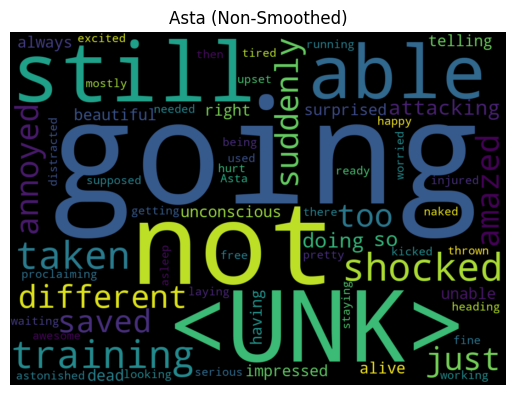

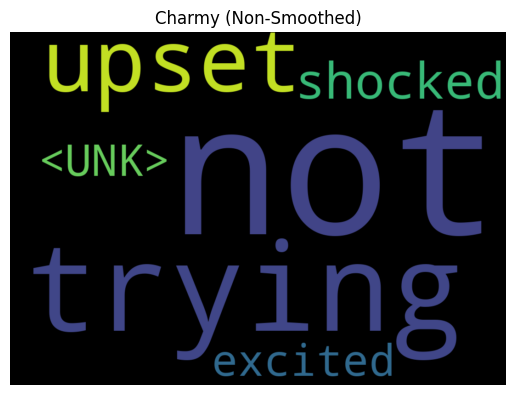

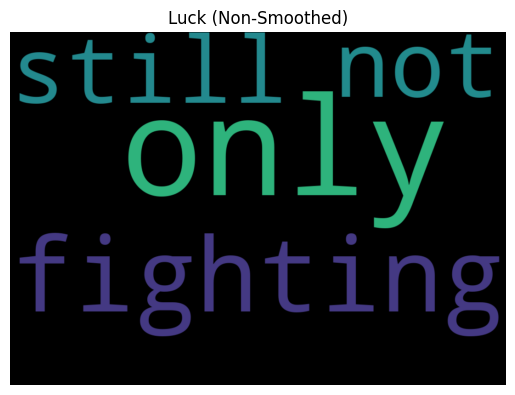

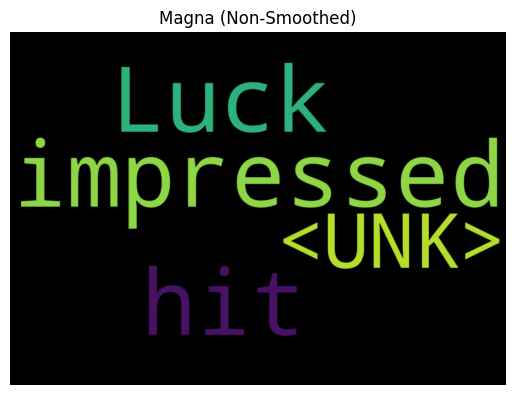

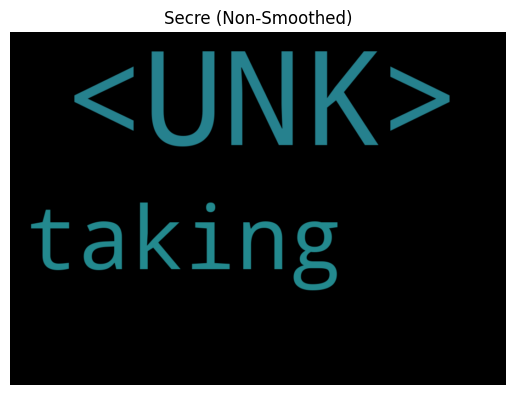

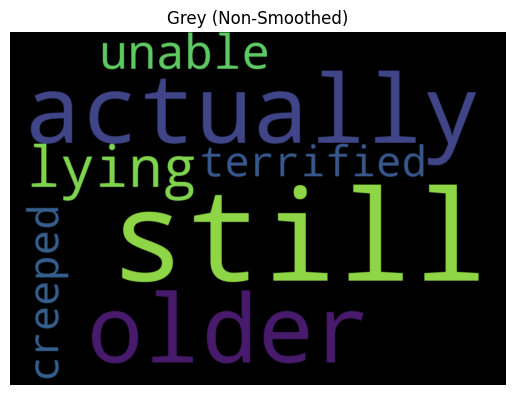

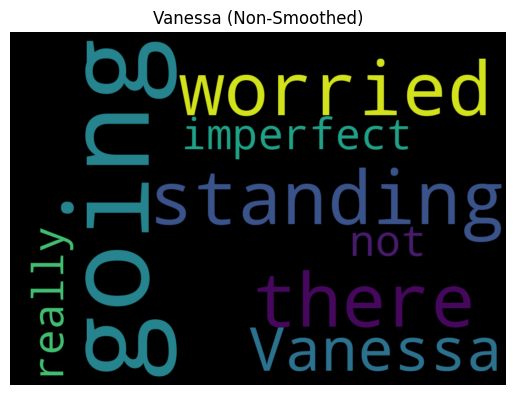

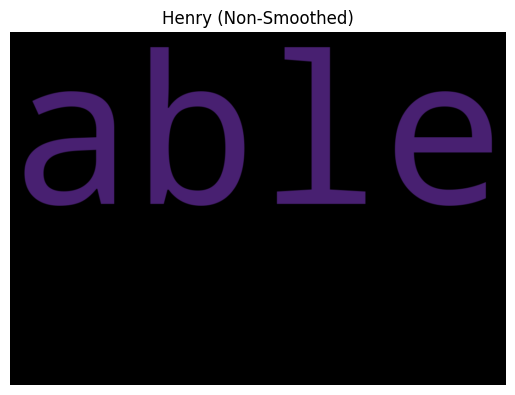

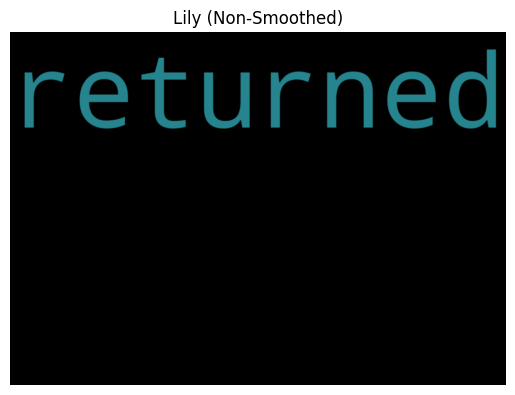

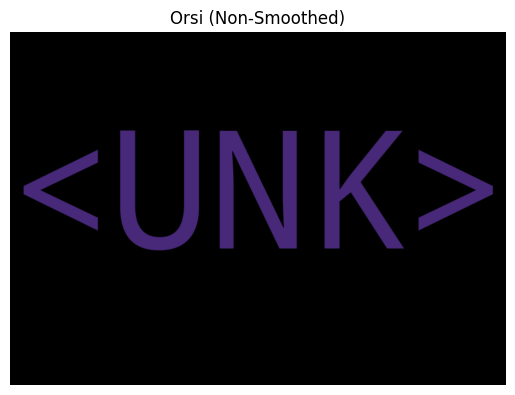

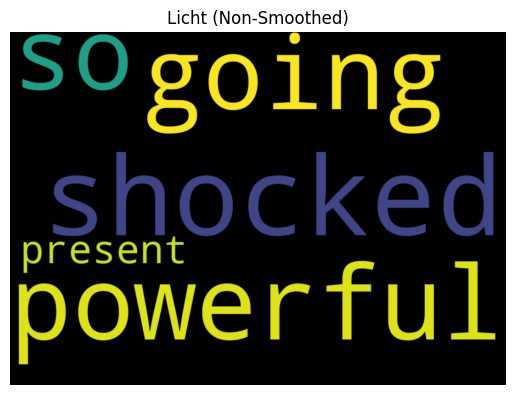

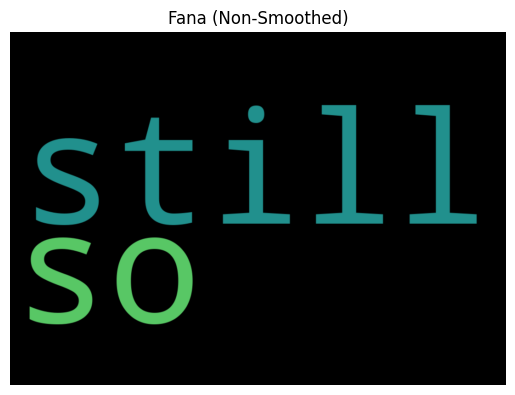

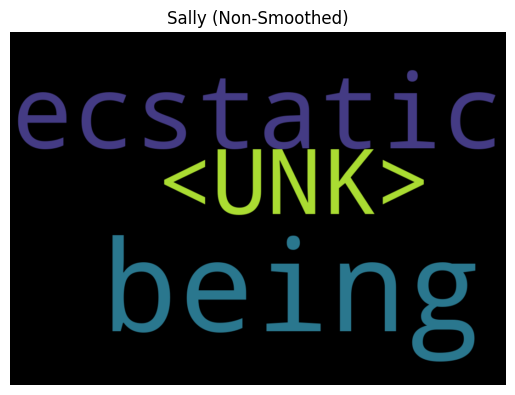

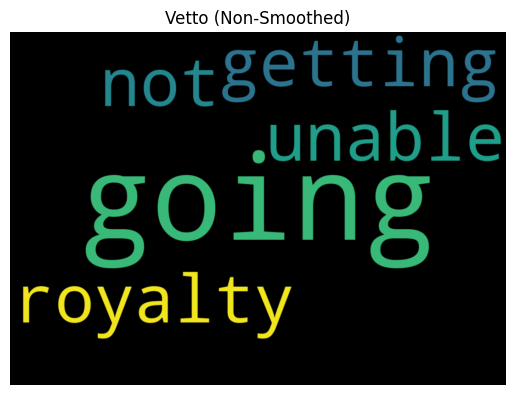

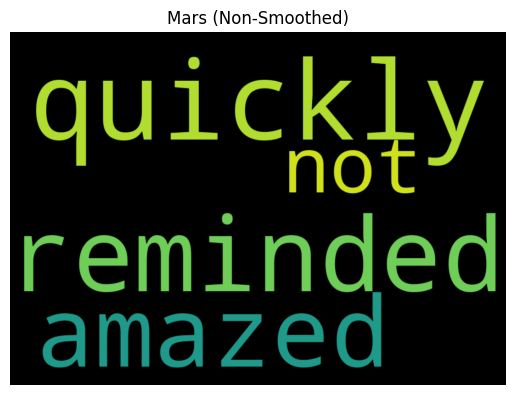

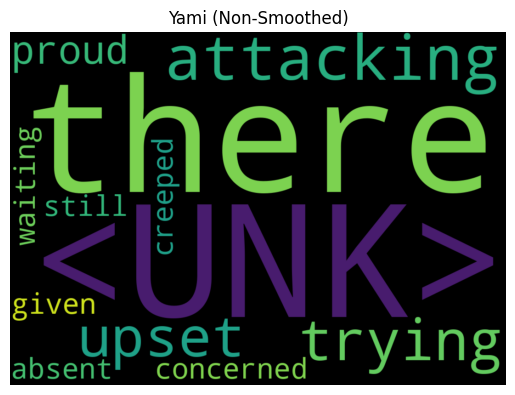

In [21]:
zero_predictions = []
less_than_ten = []
more_than_ten = []
for character in characters:
    predict = [character, "is"]
    predicted = list(filter(lambda x : nltk.pos_tag([x[0]])[0][1][:2] in pos_tag2lemmatize, sorted(lm.counts[predict].items(), key=lambda x: x[1], reverse=True)))
    if len(predicted) == 0:
        zero_predictions.append(character)
    else:
        if len(predicted) < 10:
            less_than_ten.append(character)
        else:
            more_than_ten.append(character)
        predicted_repeated = [pair[0] for pair in predicted for i in range(0, pair[1])]
        predicted_as_series = pd.Series(predicted_repeated)
        graph_wordcloud(generate_wordcloud_color(None, predicted_as_series.value_counts()), title=character + " (Non-Smoothed)")
    

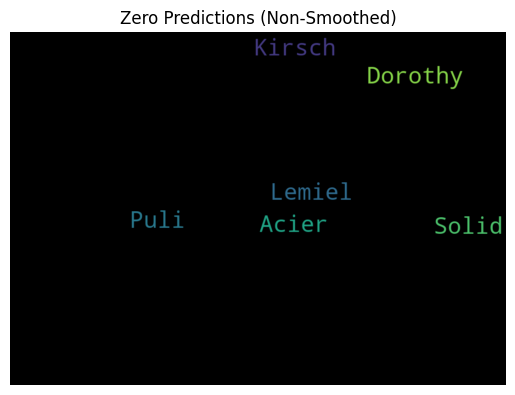

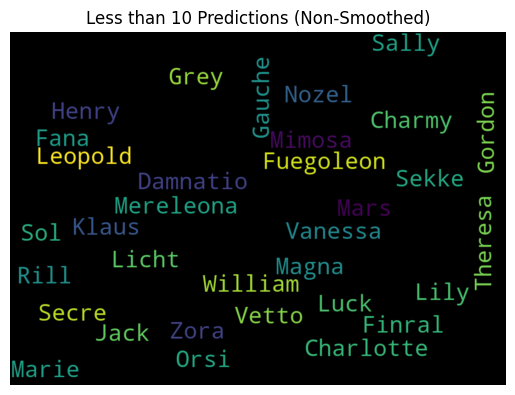

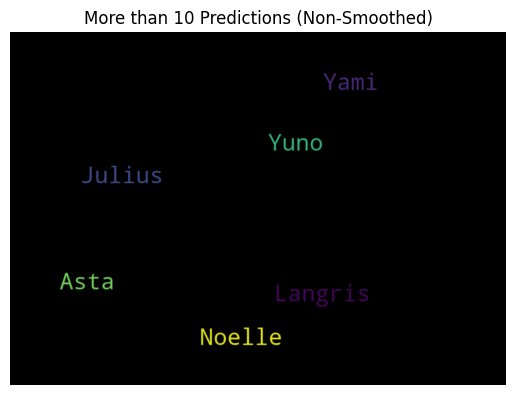

In [22]:
zero_predictions_as_series = pd.Series(zero_predictions)
less_than_ten_as_series = pd.Series(less_than_ten)
more_than_ten_as_series = pd.Series(more_than_ten)
graph_wordcloud(generate_wordcloud_color_no_ranks(None, zero_predictions_as_series.value_counts()), title="Zero Predictions (Non-Smoothed)")
graph_wordcloud(generate_wordcloud_color_no_ranks(None, less_than_ten_as_series.value_counts()), title="Less than 10 Predictions (Non-Smoothed)")
graph_wordcloud(generate_wordcloud_color_no_ranks(None, more_than_ten_as_series.value_counts()), title="More than 10 Predictions (Non-Smoothed)")

In [23]:
train, vocab_ = padded_everygram_pipeline(n, tokenized_train)
vocab = Vocabulary(vocab_, unk_cutoff=2)
lm_smoothed = Lidstone(order=n, vocabulary=vocab, gamma=.01)

In [24]:
lm_smoothed.fit(train)

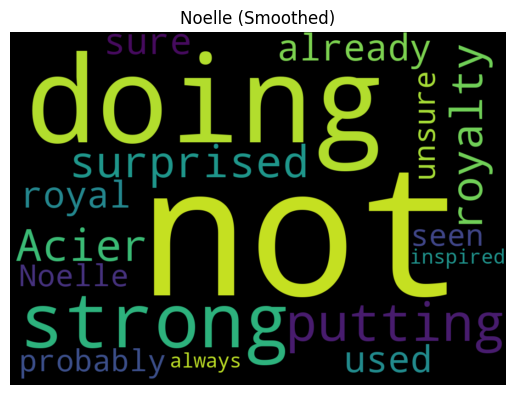

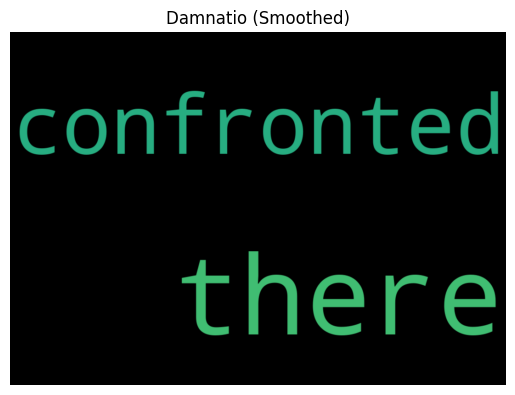

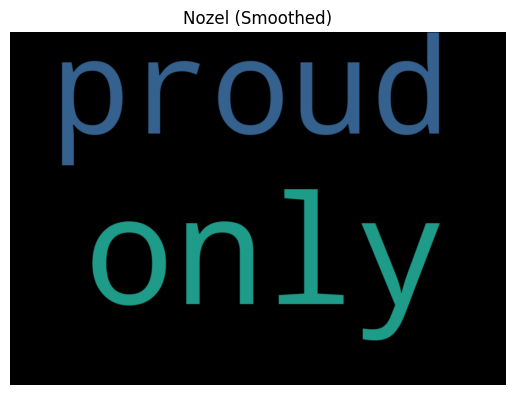

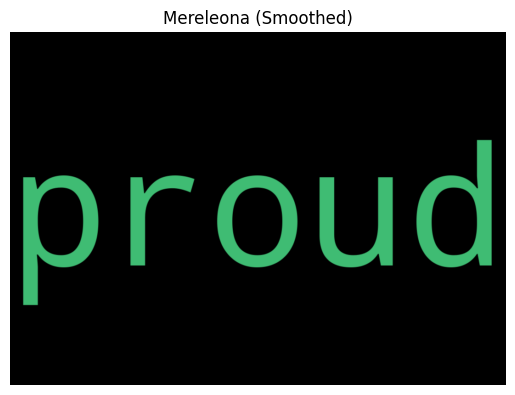

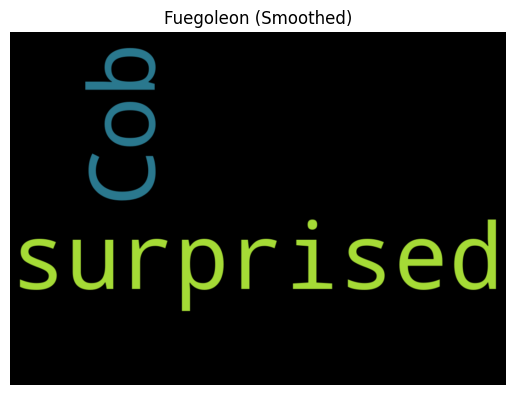

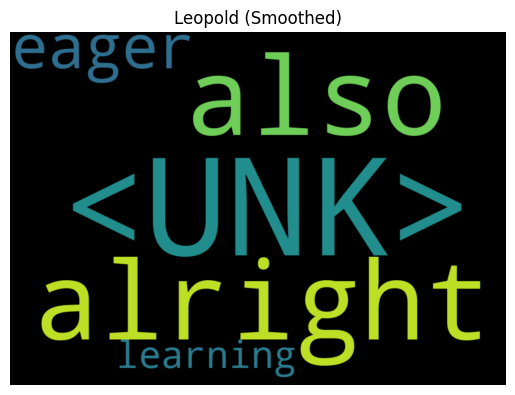

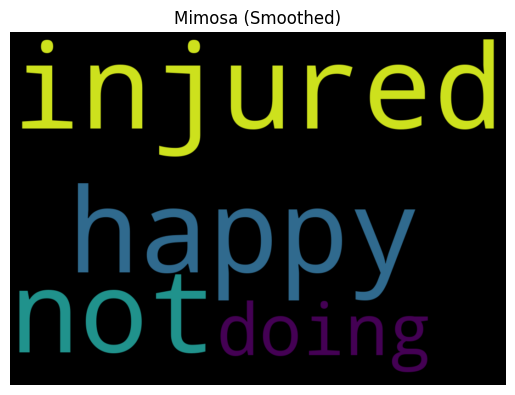

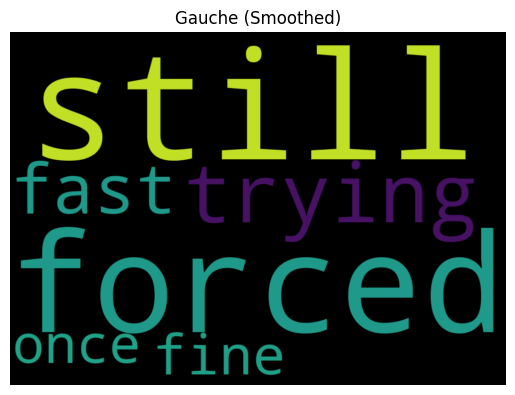

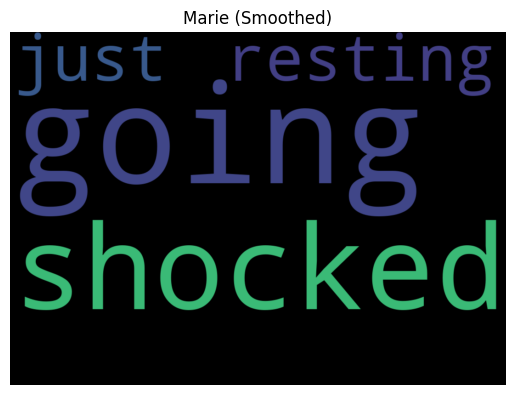

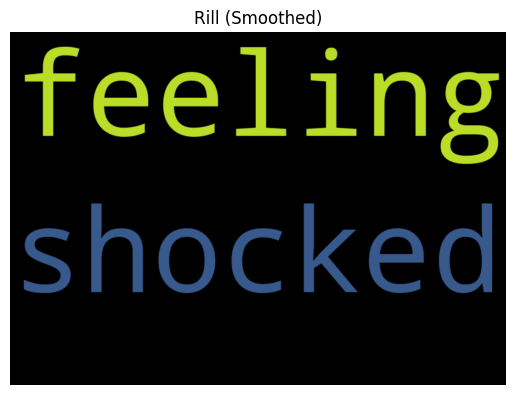

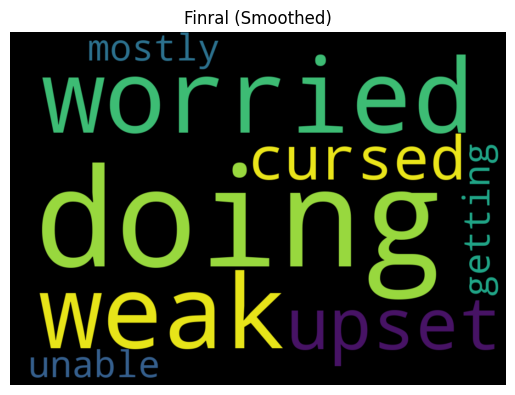

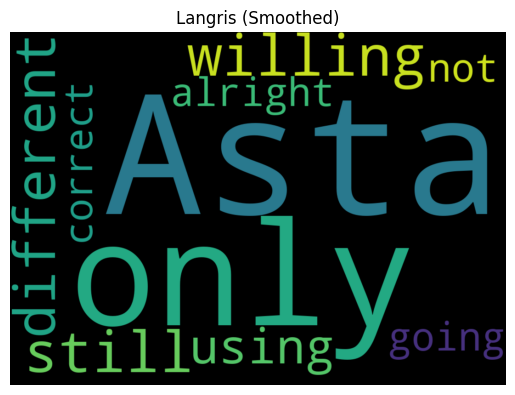

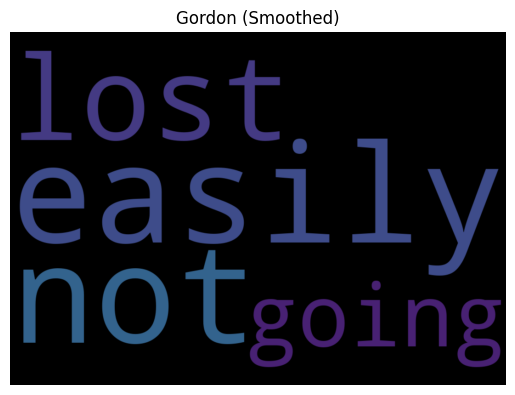

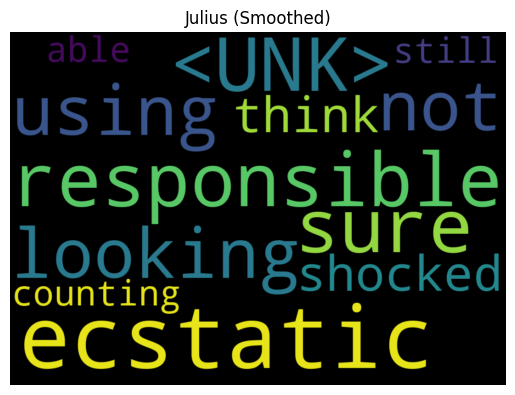

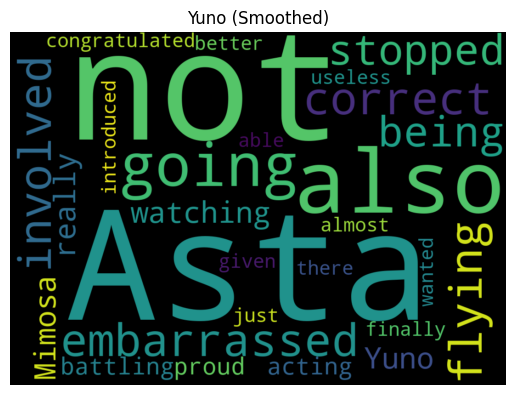

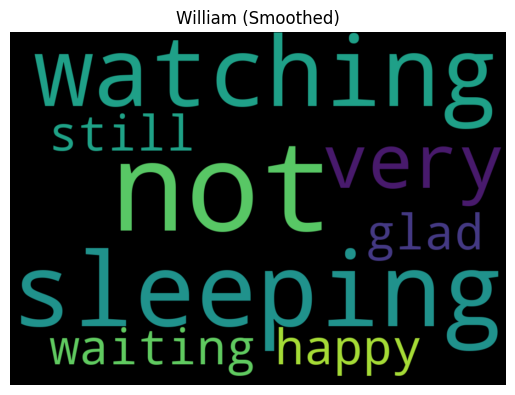

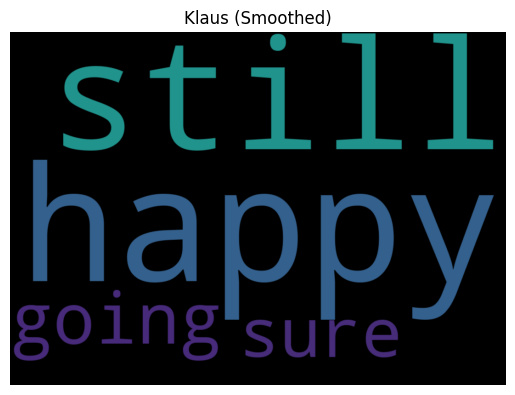

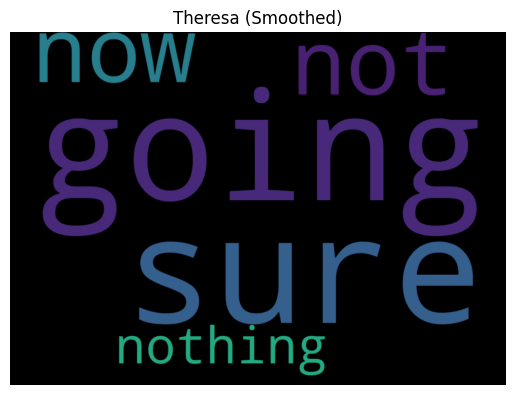

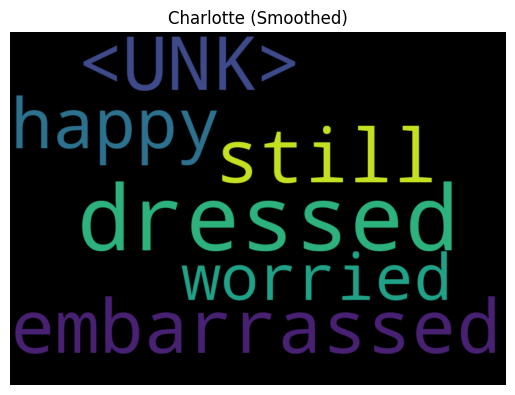

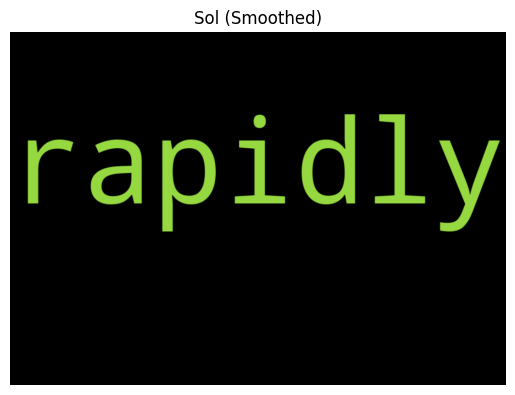

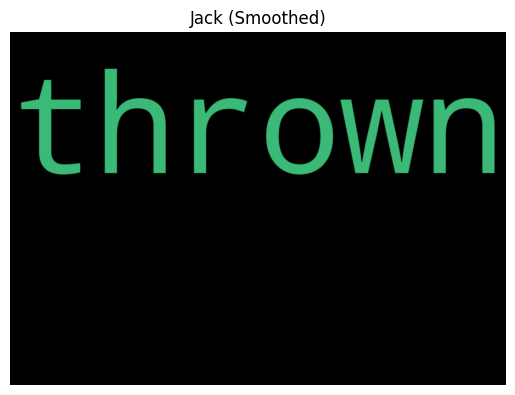

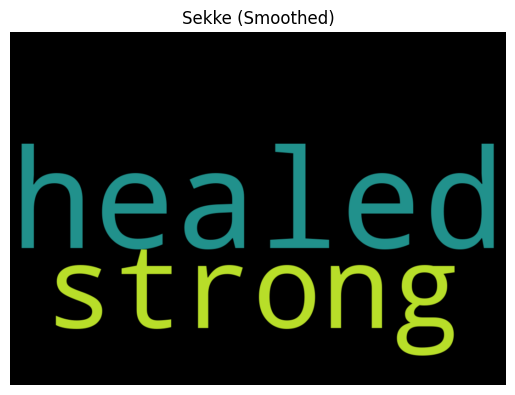

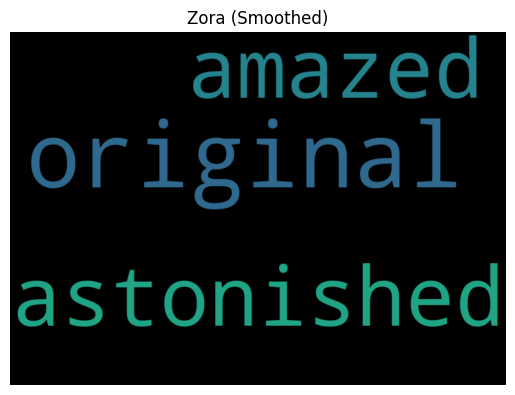

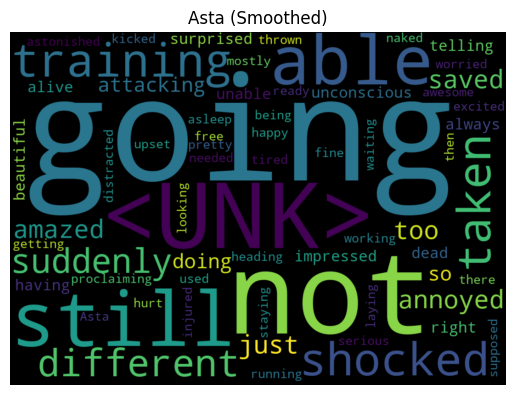

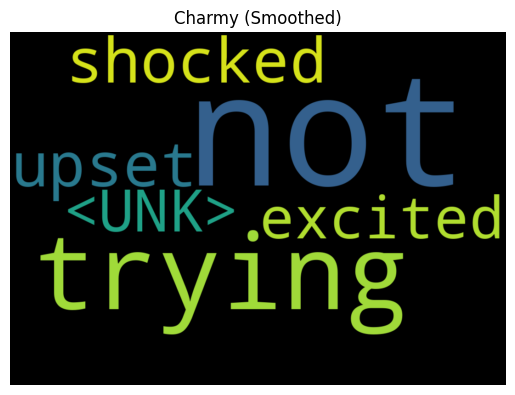

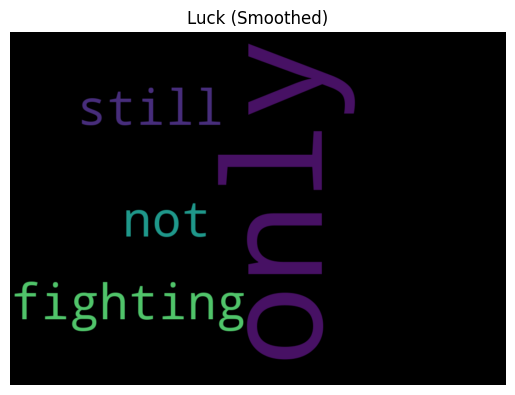

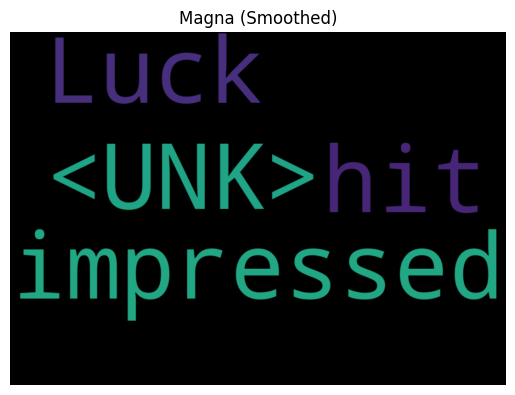

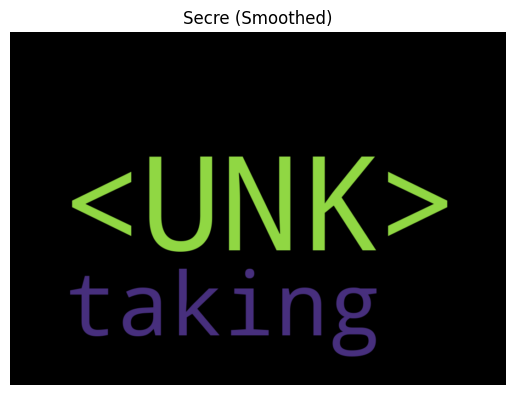

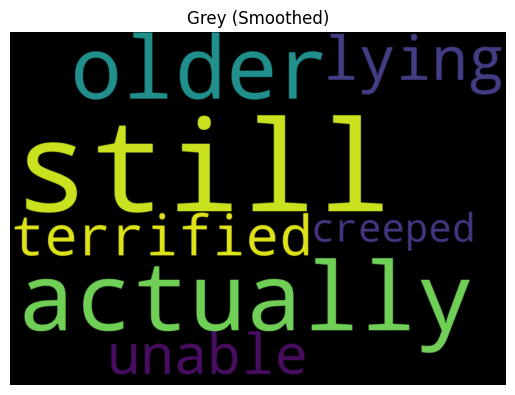

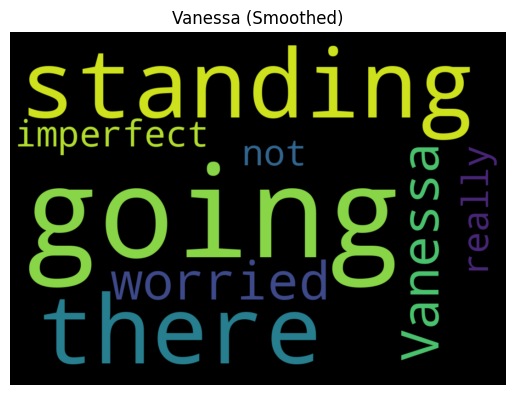

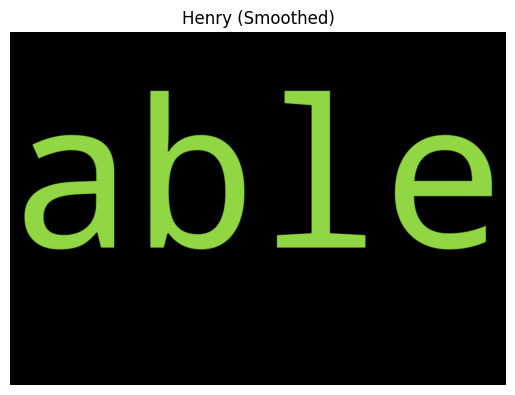

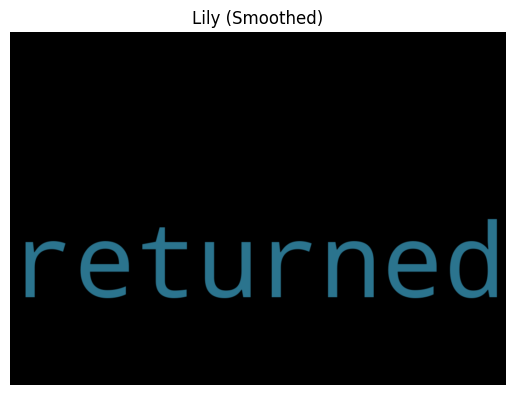

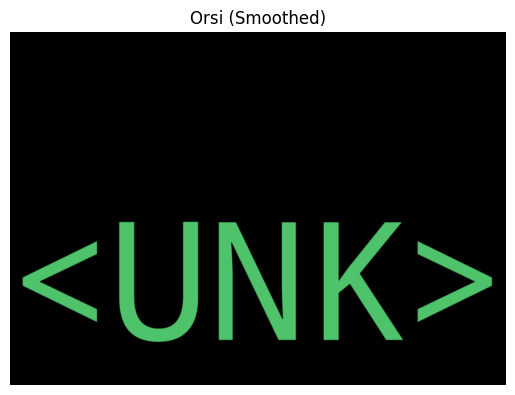

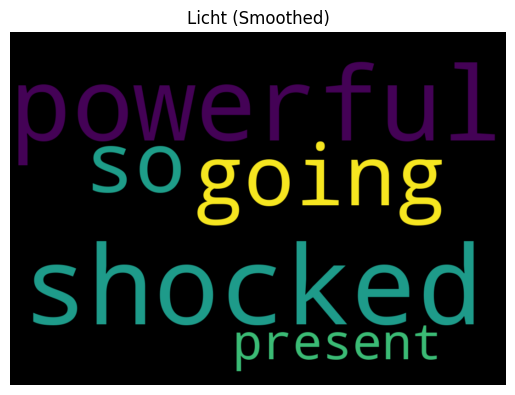

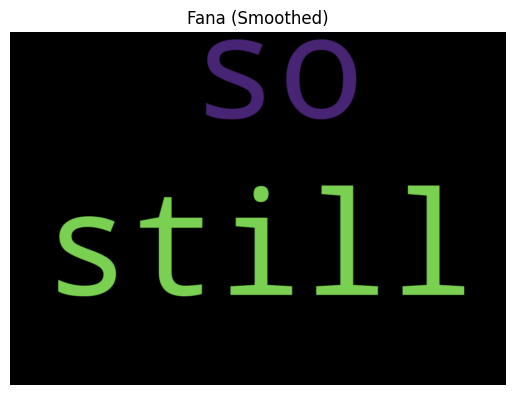

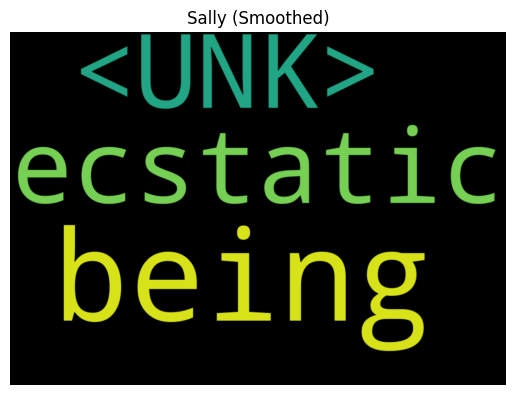

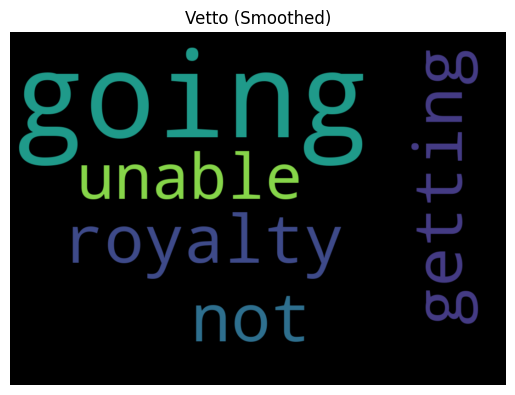

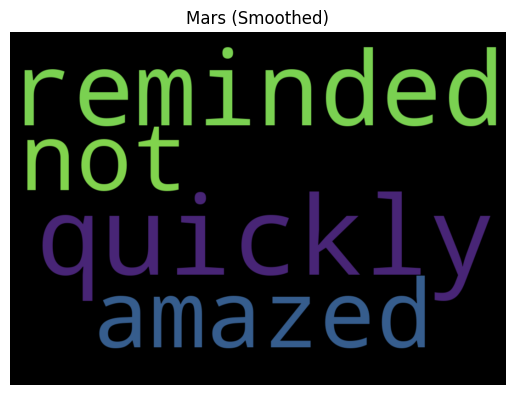

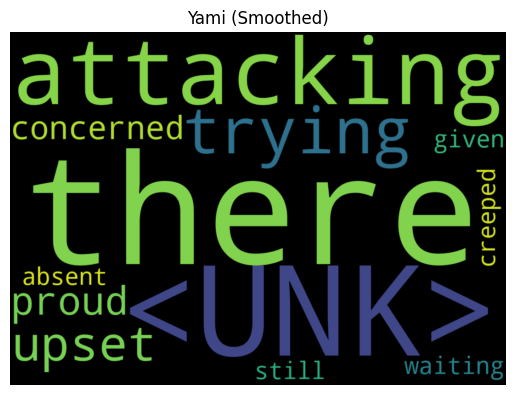

In [25]:
zero_predictions = []
less_than_ten = []
more_than_ten = []
for character in characters:
    predict = [character, "is"]
    predicted = list(filter(lambda x : nltk.pos_tag([x[0]])[0][1][:2] in pos_tag2lemmatize, sorted(lm_smoothed.counts[predict].items(), key=lambda x: x[1], reverse=True)))
    if len(predicted) == 0:
        zero_predictions.append(character)
    else:
        if len(predicted) < 10:
            less_than_ten.append(character)
        else:
            more_than_ten.append(character)
        predicted_repeated = [pair[0] for pair in predicted for i in range(0, pair[1])]
        predicted_as_series = pd.Series(predicted_repeated)
        graph_wordcloud(generate_wordcloud_color(None, predicted_as_series.value_counts()), title=character + " (Smoothed)")
    

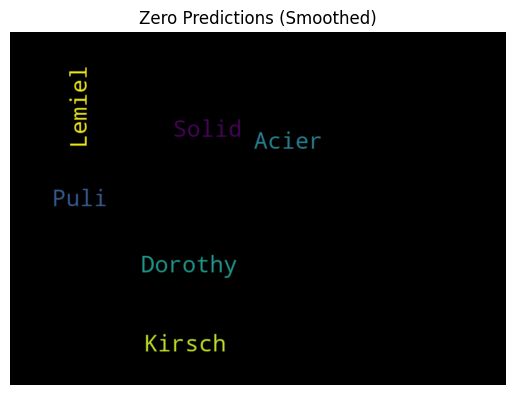

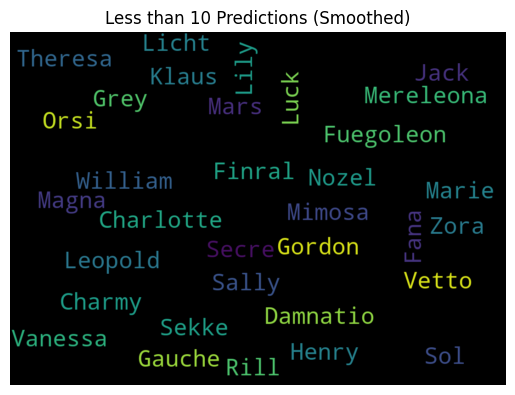

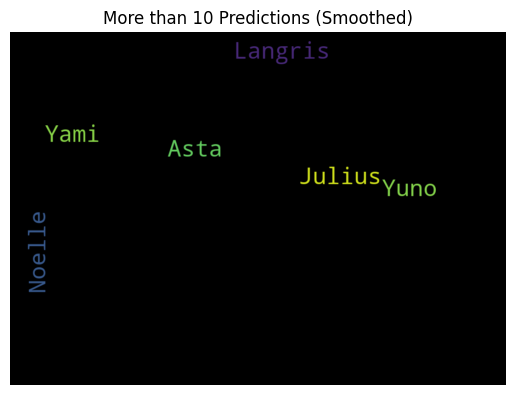

In [26]:
zero_predictions_as_series = pd.Series(zero_predictions)
less_than_ten_as_series = pd.Series(less_than_ten)
more_than_ten_as_series = pd.Series(more_than_ten)
graph_wordcloud(generate_wordcloud_color_no_ranks(None, zero_predictions_as_series.value_counts()), title="Zero Predictions (Smoothed)")
graph_wordcloud(generate_wordcloud_color_no_ranks(None, less_than_ten_as_series.value_counts()), title="Less than 10 Predictions (Smoothed)")
graph_wordcloud(generate_wordcloud_color_no_ranks(None, more_than_ten_as_series.value_counts()), title="More than 10 Predictions (Smoothed)")

In [27]:
def perplexity(tokens, lm, ngram_order=3) -> float:
    """Tenemos que generar los ngrams con padding "a mano" en test, procurando
    que sea el mismo criterio que en train.
    """
    ngrams_padded = ngrams(
        tokens, ngram_order, pad_right=True, pad_left=True, left_pad_symbol="<s>",
        right_pad_symbol="</s>")
    return lm.perplexity(list(ngrams_padded))

In [28]:
perplexity(["Asta", "is"], lm, n)

inf

In [29]:
for character in characters:
    print(str(int(perplexity([character, "is"], lm_smoothed, n))) + "\t\t" + character)

5741		Acier
1717		Noelle
3253		Damnatio
1909		Nozel
3783		Solid
2214		Mereleona
2890		Fuegoleon
2922		Leopold
3001		Kirsch
1825		Mimosa
1697		Gauche
2097		Marie
2079		Rill
1644		Finral
1898		Langris
2905		Gordon
3441		Lemiel
1837		Julius
1584		Yuno
2851		William
1718		Klaus
3110		Theresa
1734		Charlotte
3441		Puli
1960		Sol
3783		Dorothy
2097		Jack
2968		Sekke
1829		Zora
1395		Asta
1707		Charmy
2897		Luck
1867		Magna
3021		Secre
1846		Grey
2806		Vanessa
3300		Henry
2143		Lily
3253		Orsi
1751		Licht
2931		Fana
2007		Sally
1784		Vetto
3033		Mars
1616		Yami


In [30]:
tokens_ = lm.generate(20, text_seed=["<s>", "Asta is "]) 
print(" ".join(tokens_))

, Yami takes out Licht katana and confronts Licht , calling Licht `` Vangeance . '' </s> </s> </s> </s>


In [31]:
tokens_ = lm_smoothed.generate(20, text_seed=["<s>", "Asta is "]) 
print(" ".join(tokens_))

Kahono 's question , Asta states that Asta likes Noelle , which makes Noelle <UNK> . </s> </s> </s> </s>


In [32]:
import re

In [60]:
for character in ["Julius", "Asta", "Mereleona", "Noelle"]:
    predicter = character + " is "
    tokens_ = lm.generate(20, text_seed=["<s>", predicter]) 
    prediction = re.sub(r"<s>|</s>", "", predicter + " ".join(tokens_))
    print(prediction)

Julius is wonders how Mariella and the witches attack are able to predict Mariella and the witches attack moves so easily .
Asta is beneath the ocean , the priests of the Seabed Temple attempt to calm a guardian of the sea who was
Mereleona is to find another Arcane Stage woman , Dante claims both Vanessa and Grey as Dante women .   
Noelle is surprised to learn that there is air down here .          


In [103]:
for character in ["Julius", "Asta", "Mereleona", "Noelle"]:
    predicter = character + " is "
    tokens_ = lm_smoothed.generate(20, text_seed=["<s>", predicter]) 
    prediction = re.sub(r"<s>|</s>", "", predicter + " ".join(tokens_))
    print(prediction)

Julius is through town , Father Orsi Orfai explains that the people of Hage , after being inspired by Asta and Yuno
Asta is to get away from the anti-birds , Asta runs into Yami Sukehiro , captain of the Black Bulls , and
Mereleona is the time of the next Captain 's meeting , Charlotte tries asking Yami about the joint training session , but
Noelle is by Vanessa 's beauty , Dante introduces Dante as one of the Dark Triad and asks Vanessa to be Dante
